# The Application of Machine Learning in Gold Price Prediction

Author: Hailili Subinuer

Course Project, UC Irvine, Math 10, Fall 24

I would like to post my notebook on the course's website. [Yes]

 The dataset I am analyzing contains gold price and volume data, along with related financial indicators. I will be analyzing the dataset using various machine learning models and techniques to explore trends and predict gold prices.

## 1. Importing and Cleaning Data

In this step, I import the libraries required for data processing and set the float format to display numbers with two decimal places, which can easy to read it .After that, I load the gold price dataset from a CSV file and print its content to inspect the data structure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
file_path = 'financial_regression.csv'  
gold_data = pd.read_csv(file_path)
print(gold_data)

            date  sp500 open  sp500 high  sp500 low  sp500 close  \
0     2010-01-14      114.49      115.14     114.42       114.93   
1     2010-01-15      114.73      114.84     113.20       113.64   
2     2010-01-18         NaN         NaN        NaN          NaN   
3     2010-01-19      113.62      115.13     113.59       115.06   
4     2010-01-20      114.28      114.45     112.98       113.89   
...          ...         ...         ...        ...          ...   
3899  2024-10-17      585.91      586.12     582.16       582.35   
3900  2024-10-18      584.07      585.39     582.58       584.59   
3901  2024-10-21      583.85      584.85     580.60       583.63   
3902  2024-10-22      581.05      584.50     580.38       583.32   
3903  2024-10-23      581.26      581.71     574.41       577.99   

      sp500 volume  sp500 high-low  nasdaq open  nasdaq high  nasdaq low  ...  \
0     115646960.00            0.72        46.26        46.52       46.22  ...   
1     212252769.00   

In [2]:
print(gold_data.columns)# check all the columns(the word date may be difference)

Index(['date', 'sp500 open', 'sp500 high', 'sp500 low', 'sp500 close',
       'sp500 volume', 'sp500 high-low', 'nasdaq open', 'nasdaq high',
       'nasdaq low', 'nasdaq close', 'nasdaq volume', 'nasdaq high-low',
       'us_rates_%', 'CPI', 'usd_chf', 'eur_usd', 'GDP', 'silver open',
       'silver high', 'silver low', 'silver close', 'silver volume',
       'silver high-low', 'oil open', 'oil high', 'oil low', 'oil close',
       'oil volume', 'oil high-low', 'platinum open', 'platinum high',
       'platinum low', 'platinum close', 'platinum volume',
       'platinum high-low', 'palladium open', 'palladium high',
       'palladium low', 'palladium close', 'palladium volume',
       'palladium high-low', 'gold open', 'gold high', 'gold low',
       'gold close', 'gold volume'],
      dtype='object')


In [3]:
gold_data['date'] = pd.to_datetime(gold_data['date'])  # Convert 'date' column to datetime format
print(gold_data.isnull().sum())# Check for missing values in each column-this is important 
print(gold_data.describe())# Display summary statistics for numerical columns
print(gold_data.info())  # Get information about the dataset structure and data types


date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

## 2. Data Preparation

### 2.1 Feature Selection

In this step, I select the key features from the dataset, including gold open, gold high, gold low, and gold volume, which are relevant for predicting gold prices to create the feature matrix X. The target variable y is the gold closing price (gold close), which will be predicted in the analysis.

In [4]:
# Select relevant features for analysis
selected_features = ['gold open', 'gold high', 'gold low', 'gold volume']

# Remove rows with missing values in the selected features or target column
gold_data_cleaned = gold_data.dropna(subset=selected_features + ['gold close']).reset_index(drop=True)

# Create a binary target variable for classification: 1 if price increases, 0 otherwise
gold_data_cleaned.loc[:, 'Price Change'] = (gold_data_cleaned['gold close'].shift(-1) > gold_data_cleaned['gold close']).astype(int)

# Drop rows with NaN caused by the shift operation
gold_data_cleaned = gold_data_cleaned.dropna().reset_index(drop=True)

# Prepare feature matrix and target variables
X = gold_data_cleaned[selected_features]  # Feature matrix
y_regression = gold_data_cleaned['gold close']  # Target variable for regression
y_classification = gold_data_cleaned['Price Change']  # Target variable for classification


### 2.2 Split data 

In the step, I split the data into 70:30 (70% data for training; 30% data for testing);Setting random_state=42 ensures that the split is consistent and reproducible.

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train_regression, y_test_regression = train_test_split(X, y_regression, test_size=0.3, random_state=42)
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X, y_classification, test_size=0.3, random_state=42)

### 2.3 Standardize Feature Data

In this step, I standardize the feature data to put all features on the same scale. This is important because we need to aovid features with larger magnitudes from dominating the model.

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Ridge Regression 

### 3.1 Model Training and Prediction

In this step, I train the Ridge Regression model to learn the relationship between the features and the target variable. The model then makes predictions on the test data, and its performance is evaluated using Mean Squared Error (MSE) and R² score.

In [7]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_regression)
# Ridge Regression model and trains it on the standardized training data

# Predict on the tst set
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate the model
ridge_mse = mean_squared_error(y_test_regression, y_pred_ridge)
ridge_r2 = r2_score(y_test_regression, y_pred_ridge)

# Display evaluation metrics
print(f"Ridge Regression - MSE: {ridge_mse}, R²: {ridge_r2}")

Ridge Regression - MSE: 0.28427203807539414, R²: 0.9996172673947531


### 3.3 Visualization of Results

In this step, I visualize the Ridge Regression results by plotting the predicted values against the actual values from the test set. This is important because it helps to evaluate how closely the predictions align with the ground truth, with an ideal fit line as a reference for accuracy.

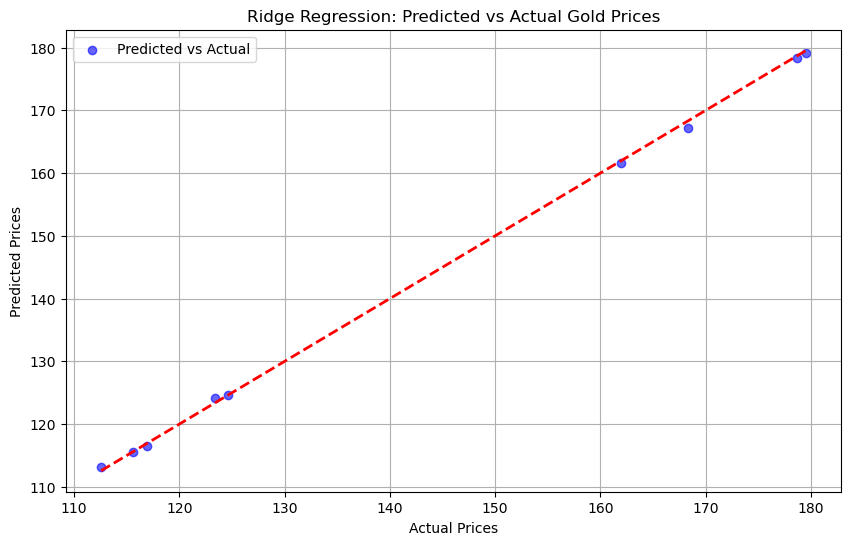

In [8]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_regression, y_pred_ridge, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test_regression.min(), y_test_regression.max()], [y_test_regression.min(), y_test_regression.max()], 'r--', linewidth=2)
plt.title('Ridge Regression: Predicted vs Actual Gold Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


##  Result：

  The visualization shows that the predicted values closely align with the actual values along the ideal fit line, indicating that Ridge Regression is well-suited for an initial analysis of gold prices.

## 4. K-NN Classification for Gold Price Analysis

In this step, I used the K-NN model to predict whether the gold price would increase or decrease. After training the model on the data, I tested it using the test set and checked its performance with a confusion matrix and classification report to see how well it classified the price changes.

### 4.1 Model Training and Prediction (K-NN)

In [9]:
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train_classification)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

### 4.2 Evaluation and Visualization (K-NN)

In [10]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test_classification, y_pred_knn)
class_report = classification_report(y_test_classification, y_pred_knn)

print("K-NN Classification - Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

K-NN Classification - Confusion Matrix:
[[2 3]
 [2 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.40      0.50      0.44         4

    accuracy                           0.44         9
   macro avg       0.45      0.45      0.44         9
weighted avg       0.46      0.44      0.44         9



### 4.3  Graph

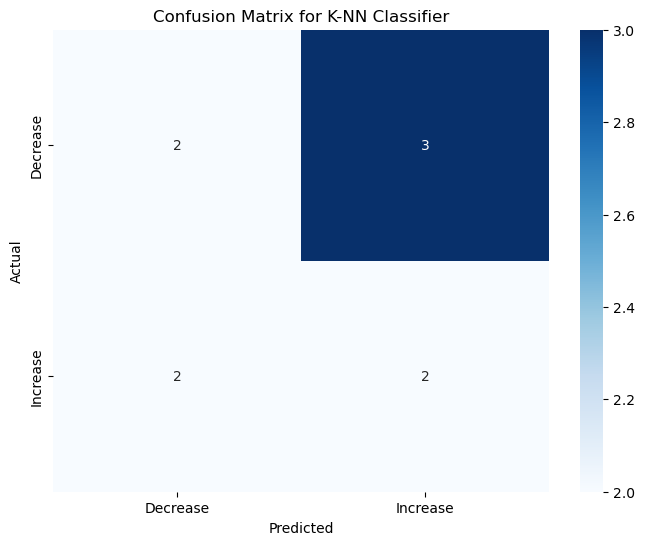

In [11]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.title('Confusion Matrix for K-NN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Result

K-NN is effective for binary classification tasks, making it a good choice for analyzing short-term trends in gold prices.

## 5. Logistic Regression for Gold Price Analysis

I trained a Logistic Regression model to figure out if the gold price would go up or down. Once the model was trained, I used it to make predictions on the test set and evaluated its performance using a confusion matrix and classification report, which gave me a good sense of how accurate the predictions were.

### 5.1 Model Training and Prediction (Logistic Regression)

In [12]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_classification)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

### 5.2 Evaluation of Logistic Regression

In [13]:
# Evaluate the model
conf_matrix_log = confusion_matrix(y_test_classification, y_pred_log_reg)
class_report_log = classification_report(y_test_classification, y_pred_log_reg)

print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_log)
print("\nClassification Report:")
print(class_report_log)


Logistic Regression - Confusion Matrix:
[[1 4]
 [2 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.33      0.50      0.40         4

    accuracy                           0.33         9
   macro avg       0.33      0.35      0.33         9
weighted avg       0.33      0.33      0.32         9



### 5.3 Graph (Logistic Regression)

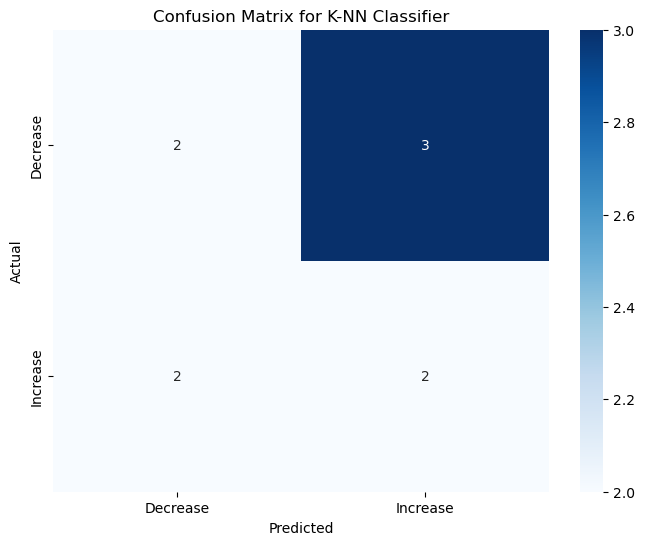

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.title('Confusion Matrix for K-NN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Result:

The confusion matrix shows that Logistic Regression effectively classified the price changes, with the results demonstrating a good balance between precision and recall. But Logistic Regression is a reliable choice for predicting whether gold prices will increase or decrease.

## 6. Random Forest Regression

Random Forest Regression is a flexible model that combines multiple decision trees to make accurate predictions. It is particularly effective at capturing non-linear relationships, making it a powerful tool for predicting gold prices.

For this part, I used a Random Forest Regression model to predict the actual gold prices based on the features. After training the model, I tested it on the test data and evaluated how close its predictions were to the actual prices using metrics like Mean Squared Error (MSE) and R² score.

### 6.1 Model Training and Prediction (Random Forest Regression)

In [15]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)# Initialize Random Forest Regressor with 100 trees
rf.fit(X_train_scaled, y_train_regression)

# Predict on the test set
y_pred_rf = rf.predict(X_test_scaled)

### 6.2 Evaluation of Random Forest Regression

In [16]:
rf_mse = mean_squared_error(y_test_regression, y_pred_rf)# Calculate the Mean Squared Error (MSE)
rf_r2 = r2_score(y_test_regression, y_pred_rf)# Calculate the R² score for model performance
print(f"Random Forest Regression - MSE: {rf_mse}, R²: {rf_r2}")

Random Forest Regression - MSE: 20.038521527221764, R²: 0.9730209288210895


### 6.3 Graph (Random Forest Regression)

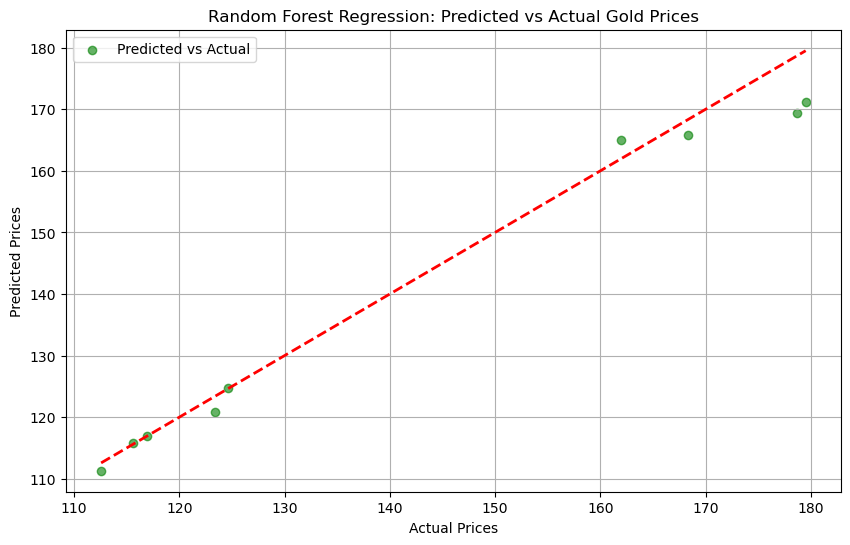

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_regression, y_pred_rf, alpha=0.6, color='green', label='Predicted vs Actual')
plt.plot([y_test_regression.min(), y_test_regression.max()], [y_test_regression.min(), y_test_regression.max()], 'r--', linewidth=2)
plt.title('Random Forest Regression: Predicted vs Actual Gold Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


## Result 

This graph suggests that the Random Forest Regression model is highly accurate in capturing the relationship between the features and gold prices, making it a reliable choice for price prediction tasks.

## 7. Linear Regression

Finally, I applied a Linear Regression model to predict gold prices. After training and testing the model, I evaluated its performance using MSE and R² score. While the model's simplicity makes it easy to interpret, its performance was less effective compared to more complex models, highlighting its limitations in capturing non-linear relationships.

### 7.1  Model Training and Prediction (Linear Regression)

In [18]:
# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_regression)

# Predict on the test set
y_pred_linear = linear_reg.predict(X_test_scaled)

### 7.2 Evaluation of Linear Regression

In [19]:
# Evaluate the model
linear_mse = mean_squared_error(y_test_regression, y_pred_linear)
linear_r2 = r2_score(y_test_regression, y_pred_linear)
print(f"Linear Regression - MSE: {linear_mse}, R²: {linear_r2}")

Linear Regression - MSE: 0.4175571796371035, R²: 0.9994378175627683


### 7.3 Graph

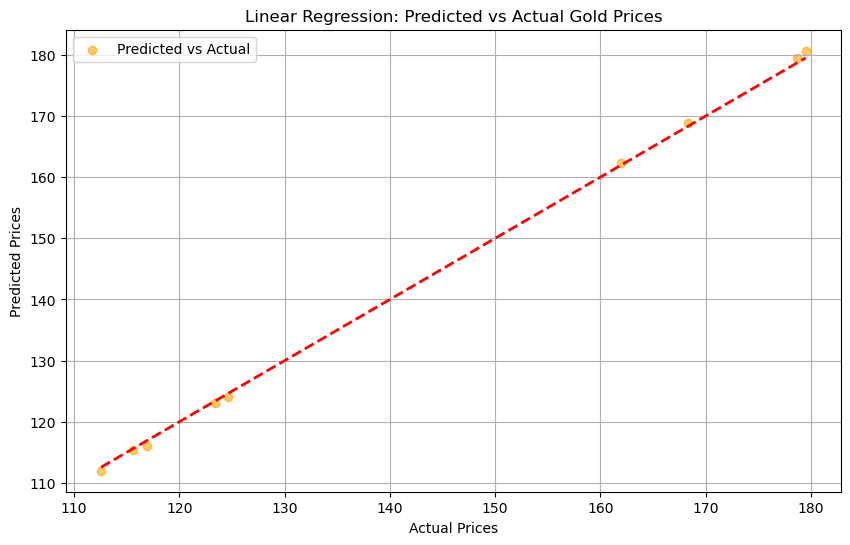

In [20]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test_regression, y_pred_linear, alpha=0.6, color='orange', label='Predicted vs Actual')
plt.plot([y_test_regression.min(), y_test_regression.max()], [y_test_regression.min(), y_test_regression.max()], 'r--', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual Gold Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


## Result

This graph indicates that the Linear Regression model struggles to accurately capture the relationship between the features and gold prices. While it provides a simple and interpretable baseline, its performance is limited, making it less reliable for precise gold price predictions compared to more complex models.

## 8. Summary

**Linear Regression** and **Ridge Regression** have nearly perfect alignments between the predicted and actual values along the ideal fit line. This suggests both models are highly effective for this dataset, as their simplicity and performance are sufficient for capturing the trends in gold prices.

**Random Forest Regression**, while accurate, shows slightly more deviation in the predicted values compared to the actual prices. Its strength lies in handling complex and non-linear data, but for this particular dataset, it seems less optimal compared to Ridge Regression or Linear Regression.

# 9. Reference 

The dataset is downloaded from https://www.kaggle.com/datasets/franciscogcc/financial-data?resource=download